<h1>Loading Libraries</h1>
<p>Here, we'll use Pandas for data analyzation and Matplotlib for data visualization.</p>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

<h1>Loading Dataset</h1>
<p>We'll load the raw and preprocessed dataset both. We'll try to change the features while analyzing them through the relational plotting.</p>

<h4>Raw Dataset</h4>

In [6]:
df = pd.read_csv("Data-Collisions.csv")
df.head(2)

/home/tasnima/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


<h4>Preprocessed Dataset</h4>

In [7]:
pre_df = pd.read_csv('preprocessed_dataset.csv')
pre_df.head(2)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,11,0,10,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,16,0,11,0,0,...,0,0,1,0,0,1,0,0,0,0


<h1>Relational Graph among the relevant features.</h1>
<p>Here, we'll plot various relational graph and analyze them.</p>

<h3>SEVERITY CODE Vs the number of COUNT of person, pedestrians, cyclists and vehicles.</h3>

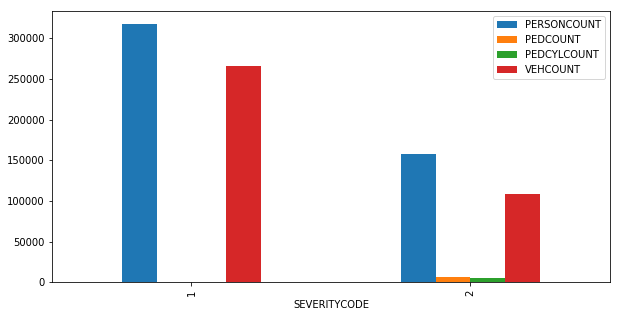

In [4]:
df[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('SEVERITYCODE').sum().plot(
    kind='bar', figsize=(10, 5))

<p>Severity Code has two classes. Class 1 is property damage and Class 2 is injury.<br>Here, we can make some conclusions:
<ul>
    <li>Persons or vehicles mostly have property damage and injured in the accident.</li>
    <li>Pedestrians and cyclists are injured in the accident, almost rare comparing to the Persons and vehicles. They have no property damage.</li>
</ul>
</p>

<h3>Seasionality Vs the number of COUNT of person, pedestrians, cyclists and vehicles.</h3>

<p>We'll split this feature into four of types: 'YEAR', 'MONTH', 'DAY' and 'DayOfWeek'.</p>

In [5]:
df['INCDATE'] = df['INCDATE'].str[:10]
df[['YEAR', 'MONTH', 'DAY']] = df['INCDATE'].str.split('/', expand=True)
df['DayOfWeek'] = pd.to_datetime(df['INCDATE']).dt.dayofweek

<h4>YEAR Vs the number of COUNT of person, pedestrians, cyclists and vehicles.</h4>

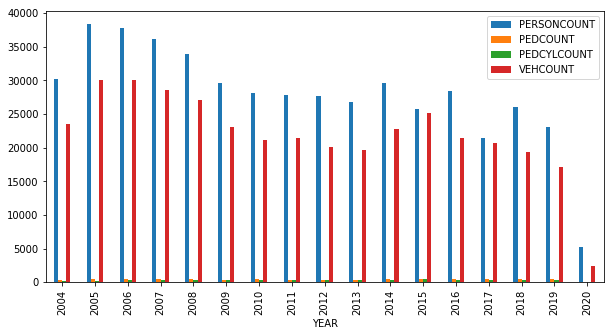

In [6]:
df[['YEAR', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('YEAR').sum().plot(
    kind='bar', figsize=(10, 5))

<p>The number of accidents per year is decreasing slowly.</p>

<h4>MONTH Vs the number of COUNT of person, pedestrians, cyclists and vehicles.</h4>

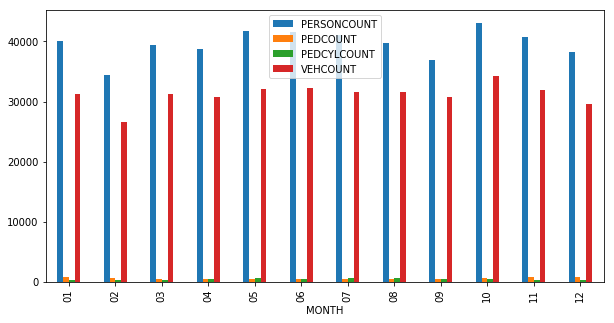

In [7]:
df[['MONTH', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('MONTH').sum().plot(
    kind='bar', figsize=(10, 5))

<h4>DayOfWeek Vs the number of COUNT of person, pedestrians, cyclists and vehicles.</h4>
<p>The day of the week with Monday=0, Sunday=6.</p>

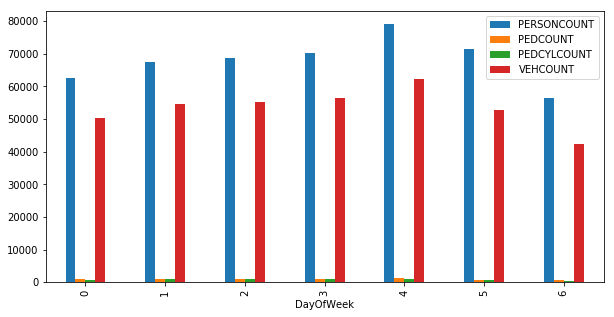

In [9]:
df[['DayOfWeek', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('DayOfWeek').sum().plot(
    kind='bar', figsize=(10, 5))

<p>From the graph, we can say that, the rate of accidents gradualy increases from Monday to Friday and than decreases to Sunday. The weekend has the smaller rate of road accident.</p>

<h3>SEVERITY CODE Vs Weather</h3>

In [17]:
weather = df['WEATHER'].unique()
weather

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

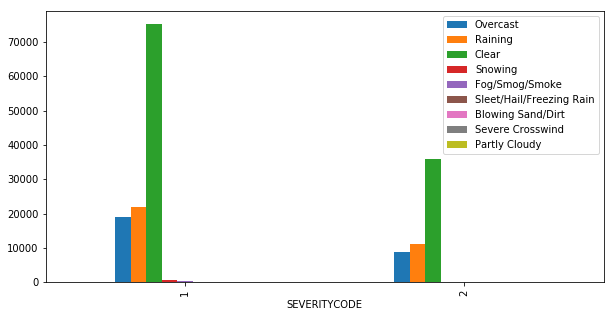

In [22]:
pre_df[['SEVERITYCODE', 'Overcast', 'Raining', 'Clear', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain',
       'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy']].groupby('SEVERITYCODE').sum().plot(
    kind='bar', figsize=(10, 5))

<h3>SEVERITY CODE Vs Address Type</h3>

In [23]:
df['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

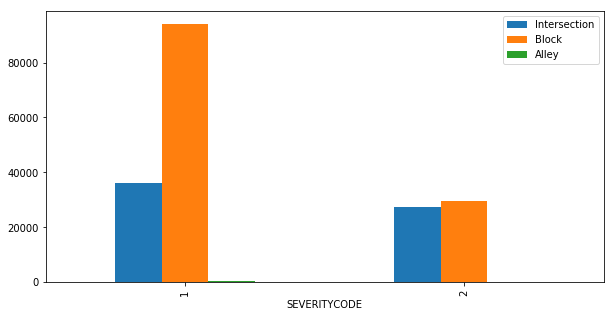

In [24]:
pre_df[['SEVERITYCODE', 'Intersection', 'Block', 'Alley']].groupby('SEVERITYCODE').sum().plot(
    kind='bar', figsize=(10, 5))

<h3>SEVERITY CODE Vs Collision Type</h3>

In [25]:
df['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

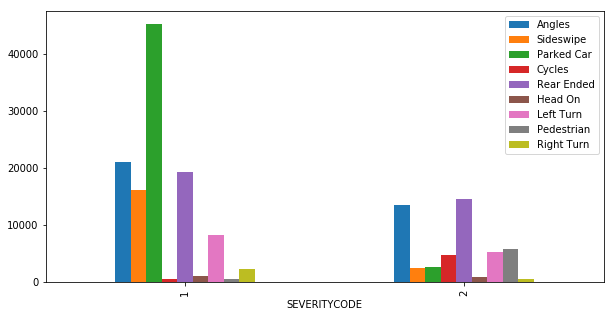

In [26]:
pre_df[['SEVERITYCODE', 'Angles', 'Sideswipe', 'Parked Car', 'Cycles', 'Rear Ended', 'Head On', 'Left Turn', 
        'Pedestrian', 'Right Turn']].groupby('SEVERITYCODE').sum().plot(kind='bar', figsize=(10, 5))

<h3>SEVERITY CODE Vs Junction Type</h3>

In [27]:
df['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Unknown', 'Ramp Junction'], dtype=object)

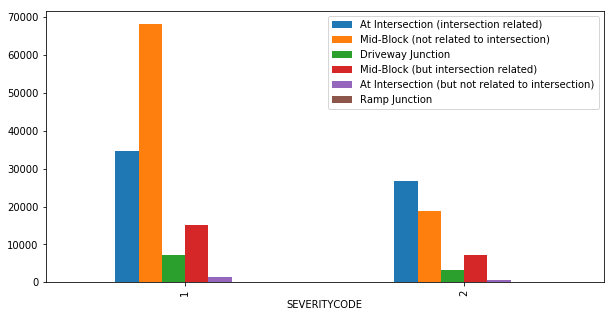

In [30]:
pre_df[['SEVERITYCODE', 'At Intersection (intersection related)', 'Mid-Block (not related to intersection)', 
        'Driveway Junction', 'Mid-Block (but intersection related)', 'At Intersection (but not related to intersection)',
        'Ramp Junction']].groupby('SEVERITYCODE').sum().plot(kind='bar', figsize=(10, 5))

<h3>SEVERITY CODE Vs UNDERINFL</h3>

In [31]:
pre_df['UNDERINFL'].unique()

array([0, 1])

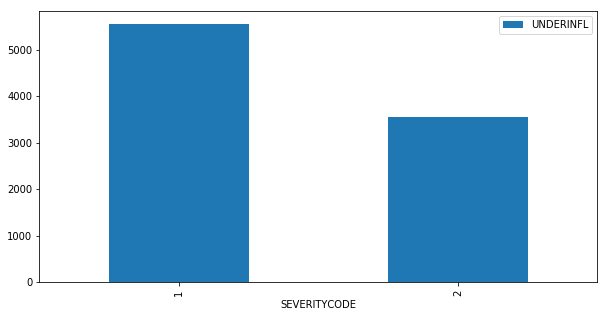

In [32]:
pre_df[['SEVERITYCODE', 'UNDERINFL']].groupby('SEVERITYCODE').sum().plot(kind='bar', figsize=(10, 5))

<h3>SEVERITY CODE Vs ROADCOND</h3>

In [33]:
df['ROADCOND'].unique()

array(['Wet', 'Dry', nan, 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

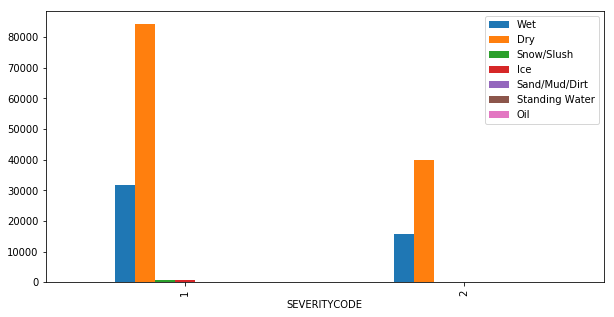

In [34]:
pre_df[['SEVERITYCODE', 'Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt', 'Standing Water', 'Oil']].groupby(
    'SEVERITYCODE').sum().plot(kind='bar', figsize=(10, 5))

<h3>SEVERITY CODE Vs LIGHTCOND</h3>

In [35]:
df['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

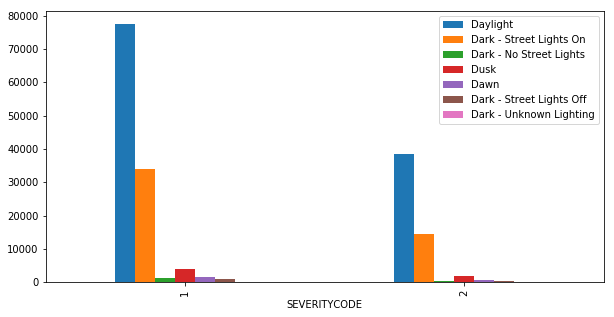

In [36]:
pre_df[['SEVERITYCODE', 'Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights', 'Dusk', 'Dawn', 
        'Dark - Street Lights Off', 'Dark - Unknown Lighting']].groupby('SEVERITYCODE').sum().plot(
    kind='bar', figsize=(10, 5))

<h3>SEVERITY CODE Vs HITPARKEDCAR</h3>

In [37]:
pre_df['HITPARKEDCAR'].unique()

array([0, 1])

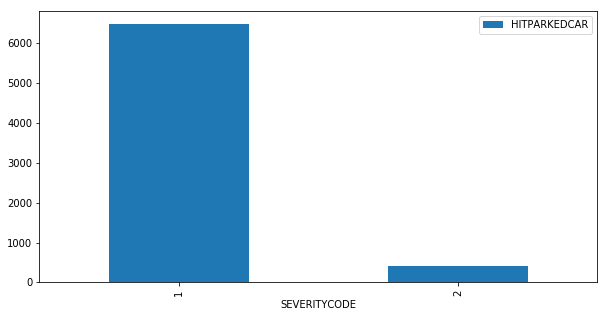

In [39]:
pre_df[['SEVERITYCODE', 'HITPARKEDCAR']].groupby('SEVERITYCODE').sum().plot(kind='bar', figsize=(10, 5))

<h3>Correlation</h3>

<h4>Chi Square Test</h4>

In [30]:
data_crosstab = pd.crosstab(df['SEVERITYCODE'], df['HITPARKEDCAR'], margins=True) 
data_crosstab

HITPARKEDCAR,N,Y,All
SEVERITYCODE,,,
1,129717,6768,136485
2,57740,448,58188
All,187457,7216,194673


In [31]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = data_crosstab[:]
# print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[131425.87130727   5059.12869273 136485.        ]
 [ 56031.12869273   2156.87130727  58188.        ]
 [187457.           7216.         194673.        ]]
probability=0.950, critical=9.488, stat=2005.485
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


<h4>Student's t-test</h4>

In [ ]:
from scipy import stats

t_test_df = pd.DataFrame(columns = ['column', 'index'])

for i in load_df.columns:
    if i != 'SEVERITYCODE':
        continue
    for j in load_df.columns:
        t_result = stats.ttest_ind(load_df[i], load_df[j])
        # print(t_result)
        p = t_result[1]

        # Test significance
        alpha= 0.05
        data = {'column': i, 'index': j}
        if (p < alpha):
            t_test_df = t_test_df.append(data, ignore_index=True)
            # print("mean value of Sample A differs from given value")
        else:
            print(j)
            # print("No significant difference found")
#t_test_df.set_index('column', inplace=True)